### Installing MediaPipe

In [1]:
%%capture
!pip install mediapipe

### Required Libraries

In [7]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow
import glob

### Dowlining Data

In [ ]:
# link of the data
# http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip

In [8]:
# Loading AFLW2000 Data
%%capture
if os.path.isfile('/content/AFLW2000-3D.zip') == False:
  !gdown --id  1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
  !unzip /content/AFLW2000-3D.zip

In [9]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

### Preparing Data

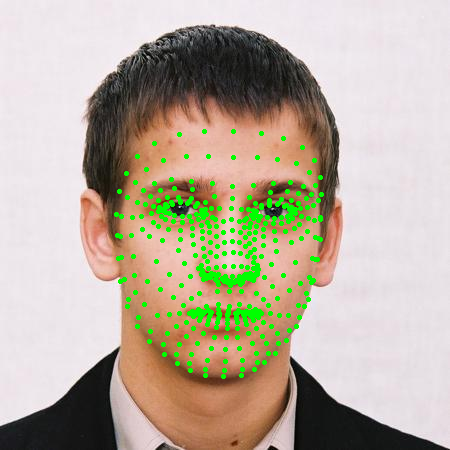

In [10]:
# choosing random image
random_file = 'image00053'

faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None:
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
          for landmark in face.landmark:
              x = landmark.x
              y = landmark.y
              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
              shape = image.shape
              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])
              # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
              cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
      cv2_imshow(image)

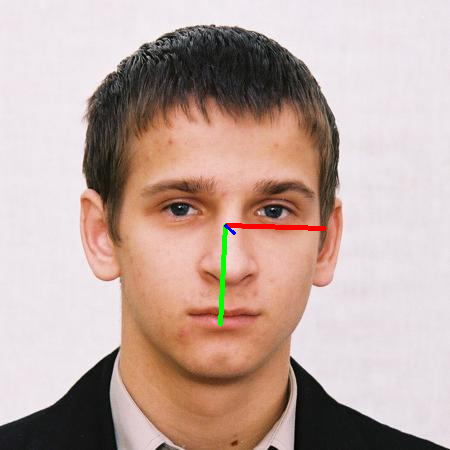

In [11]:
image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
# loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
mat_file = sio.loadmat('/content/AFLW2000/'+random_file+'.mat')
# extracting the labels 3 angels
pose_para = mat_file["Pose_Para"][0][:3]
pitch = pose_para[0]
yaw = pose_para[1]
roll = pose_para[2]
cv2_imshow(draw_axis(image,pitch,yaw,roll))


***I try to check points on images by using this code, But it cuases session crashed after using all availible RAM so i keep it in the new Notebook but without running...:***

In [ ]:
def process_image(image_path):
    faceModule = mediapipe.solutions.face_mesh
    # loading image and its corresponding mat file
    with faceModule.FaceMesh(static_image_mode=True) as faces:
        # loading the image
        image = cv2.imread(image_path)
        # processing the face to extract the landmark points (468 point) for each x,y,z
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks is not None:
            # looping over the faces in the image
            for face in results.multi_face_landmarks:
                for landmark in face.landmark:
                    x = landmark.x
                    y = landmark.y
                    # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                    shape = image.shape
                    relative_x = int(x * shape[1])
                    relative_y = int(y * shape[0])
                    # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
                    cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
            cv2_imshow(image)
        else:
            print(f"No face landmarks found in {image_path}")

# Define the directory containing the dataset
dataset_dir = '/content/AFLW2000/'

# Get the list of all image paths in the dataset directory
image_paths = [os.path.join(dataset_dir, filename) for filename in os.listdir(dataset_dir) if filename.endswith('.jpg')]

# Randomly select 10 image paths
random_image_paths = random.sample(image_paths, 10)

# Process each selected image
for image_path in random_image_paths:
    process_image(image_path)


***This code also cuased full RAM and i don't know why?*** 😰

In [ ]:
def get_poses(image_path):
    faceModule = mediapipe.solutions.face_mesh.FaceMesh(static_image_mode=True)
    pose_list = []

    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to RGB (as required by Mediapipe)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image
    results = faceModule.process(image_rgb)

    # Check if landmarks are detected
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            pose = []
            for landmark in face_landmarks.landmark:
                # Get the x and y coordinates of the landmark
                x = landmark.x * image.shape[1]
                y = landmark.y * image.shape[0]
                pose.append((x, y))
            pose_list.append(pose)
    return pose_list

# Directory containing the images
image_dir = '/content/AFLW2000/'

# List to store all poses
all_poses = []

# Iterate over all images in the directory
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        image_path = os.path.join(image_dir, filename)
        poses = get_poses(image_path)
        all_poses.extend(poses)

# Separate x and y coordinates
x_pos = [pose[0] for pose in all_poses]
y_pos = [pose[1] for pose in all_poses]


# ***I try to generalize your code and loop on all images in the data instead of creat new code from scratch and i think it works good***

In [12]:
x_Pos=[]
y_Pos=[]
Labels=[]
image_dir = '/content/AFLW2000/'

for images in glob.glob(f'{image_dir}/*.jpg'):
          faceModule = mediapipe.solutions.face_mesh

          with faceModule.FaceMesh(static_image_mode=True) as faces:
                image = cv2.imread(images)
                results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                if results.multi_face_landmarks != None:
                  mat_data = sio.loadmat(images[:-3]+'mat')
                  Labels.append(mat_data['Pose_Para'][0][:3])

                  for face in results.multi_face_landmarks:
                      X = []
                      Y = []
                      for landmark in face.landmark:
                          x = landmark.x
                          y = landmark.y
                          shape = image.shape
                          relative_x = int(x * shape[1])
                          relative_y = int(y * shape[0])
                          X.append(relative_x)
                          Y.append(relative_y)
                      x_Pos.append(X)
                      y_Pos.append(Y)


In [13]:
x_Pos = np.array(x_Pos)
y_Pos= np.array(y_Pos)
Labels=np.array(Labels)

***Check Shapes of Arrays of Data:***

In [14]:
x_Pos.shape

(1853, 468)

In [15]:
y_Pos.shape

(1853, 468)

In [16]:
Labels.shape

(1853, 3)

***Divided labels into Roll,Pitch, and Yaw..***

In [9]:
Pitch = Labels[:,0]
Yaw = Labels[:,1]
roll=Labels[:,2]

In [ ]:
Pitch.shape

(1853,)

# ***Data Normalization*** 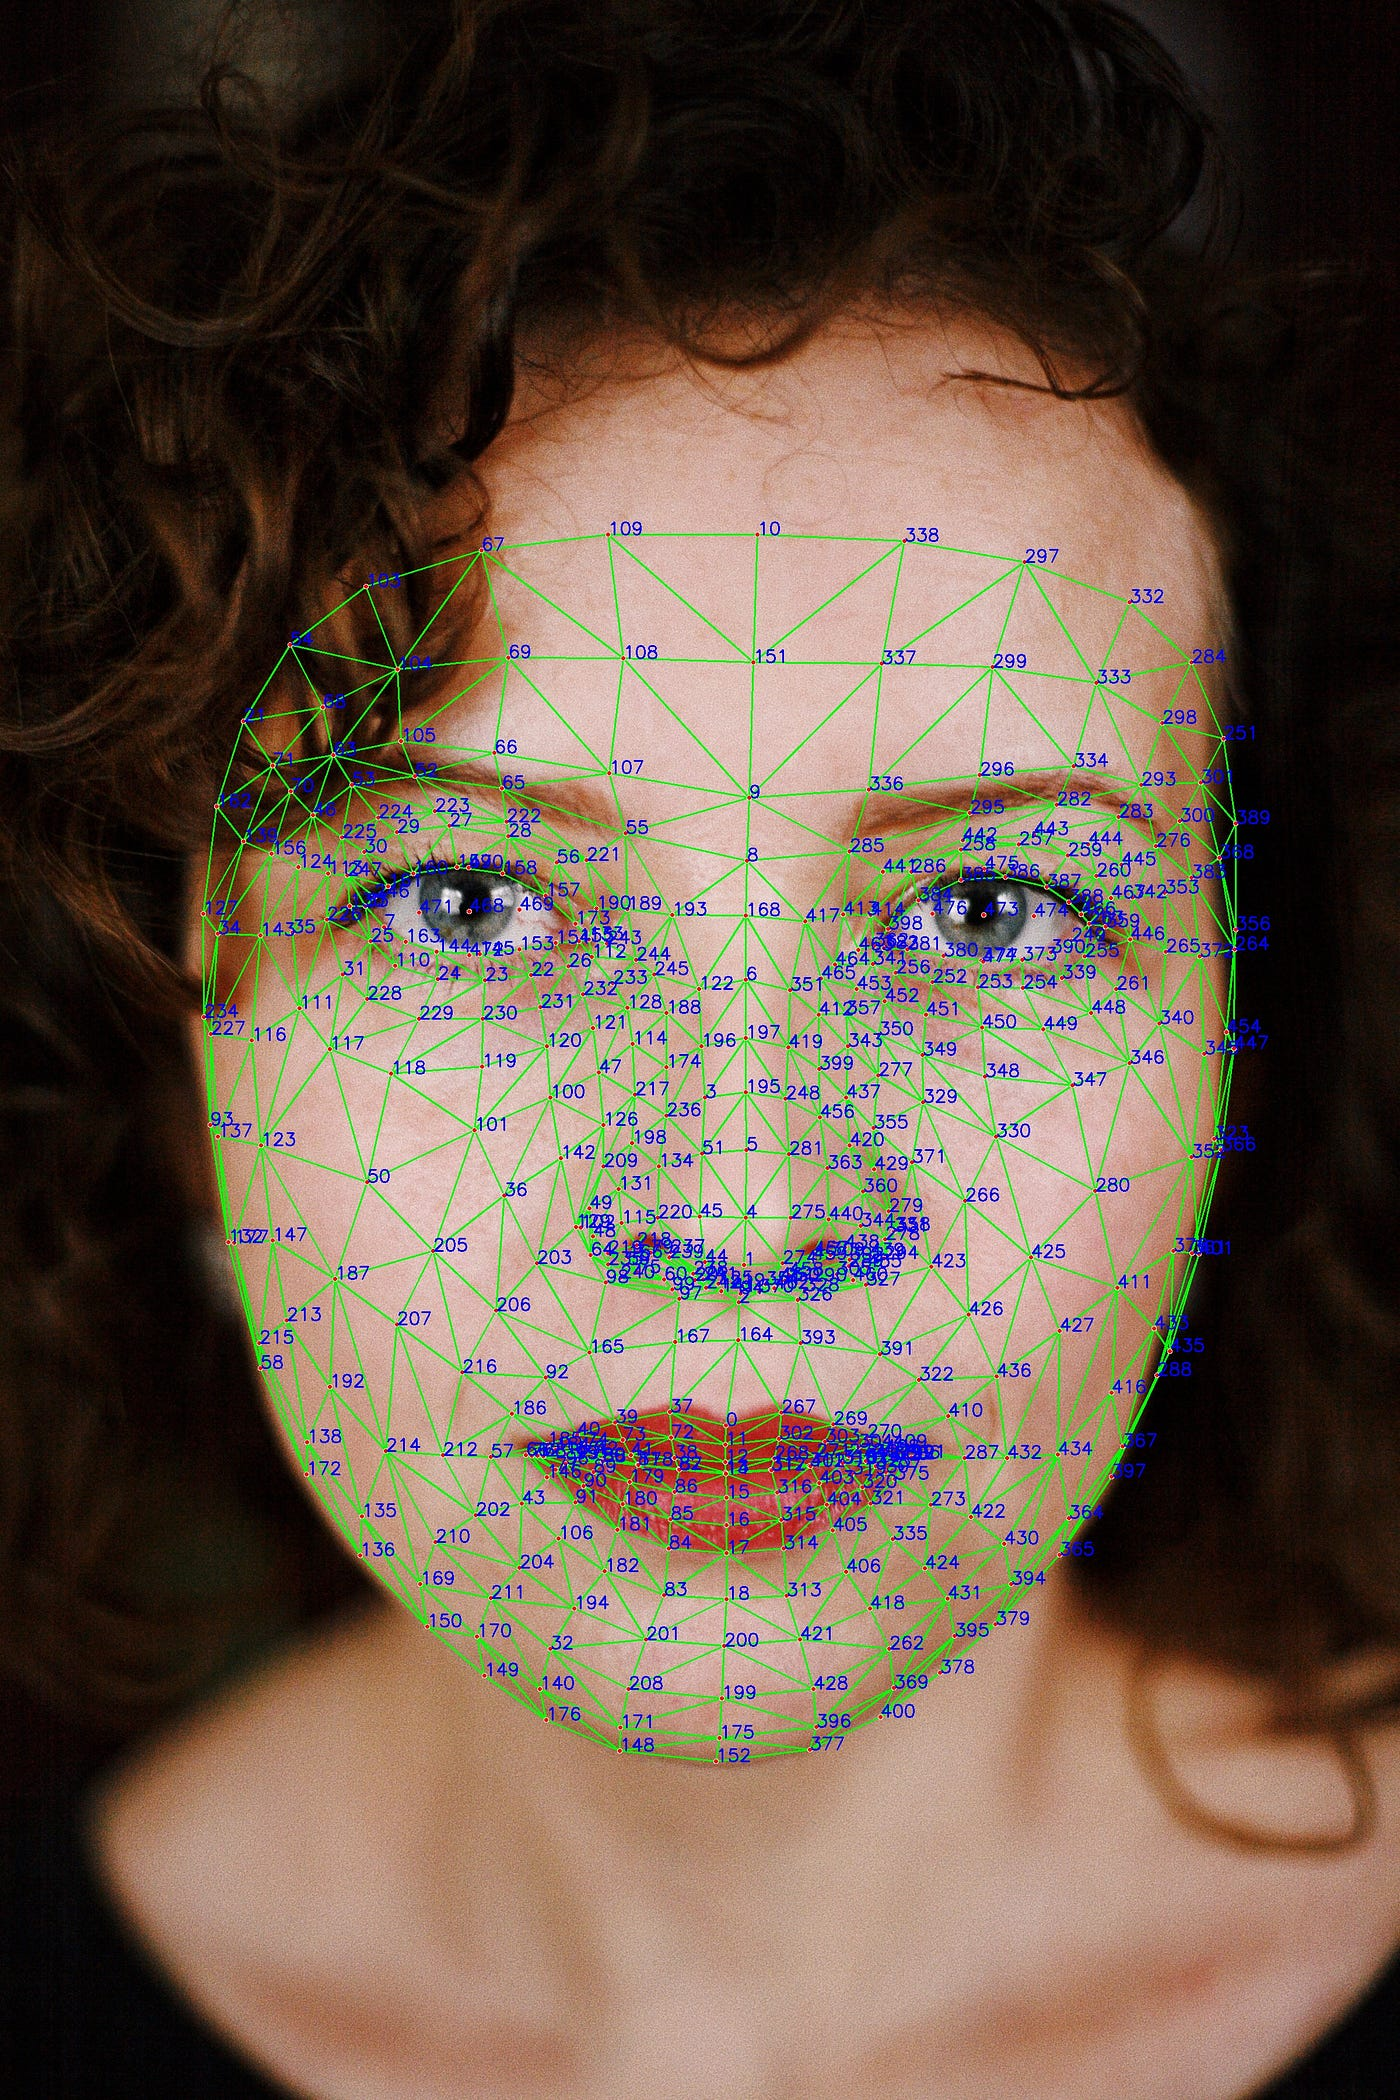

**To normalize the data we use any of the following facial key points: left eye, right eye, nose tip, mouth, left eye tragion, and right eye tragion.**

**And we decided to use nose.**

**There is many points of nose, i decided to use 4**


In [10]:
x_center = x_Pos - x_Pos[:,4].reshape(-1,1)
y_center = y_Pos - y_Pos[:,4].reshape(-1,1)


In [11]:
Data = np.hstack([x_center,y_center])

In [12]:
Data

array([[ -5,   0, -12, ..., -48, -69, -76],
       [ -1,   0,  -2, ..., -43, -53, -58],
       [  4,  -1,   7, ..., -26, -28, -31],
       ...,
       [-23,  -3, -23, ..., -42, -50, -53],
       [  2,   0,   1, ..., -37, -45, -48],
       [  1,   0,   0, ..., -56, -72, -74]])

In [13]:
Data.shape

(1853, 936)

# **Importing Models of Machine Learning:**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet

# **Training more than one model with the whole Data**

**- Split the data to train, validation and test sets**






In [15]:
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(Data, Labels, test_size=0.4, random_state=100)
features_validation, features_test, labels_validation, labels_test = train_test_split(features_validation_test, labels_validation_test, test_size=0.5, random_state=100)

In [16]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

1111
371
371
1111
371
371


**1. Linear Regression Model**

In [19]:
lr_model = LinearRegression()
lr_model.fit(features_train, labels_train)

LinearRegression()

In [27]:
print('LR model: ')
print('Train Score : ',lr_model.score(features_train, labels_train))
print('Validation Score : ', lr_model.score(features_validation, labels_validation))
y_pred = lr_model.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

LR model: 
Train Score :  0.9400233369667766
Validation Score :  -12.961185859886337
MSE: 1.1900899531476383


**2. Lasso Model**

In [43]:
Lasso_model=linear_model.Lasso(alpha=0.01)
Lasso_model.fit(features_train, labels_train)

Lasso(alpha=0.01)

In [44]:
print('Lasso model : ')
print('Train Score : ',Lasso_model.score(features_train, labels_train))
print('Validation Score : ', Lasso_model.score(features_validation, labels_validation))
y_pred = Lasso_model.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

Lasso model : 
Train Score :  0.5415176956343021
Validation Score :  0.44340244491102326
MSE: 0.05608933406194621


**3. Ridge Model**

In [41]:
Ridge_model=linear_model.Ridge(alpha=0.01)
Ridge_model.fit(features_train, labels_train)


Ridge(alpha=0.01)

In [42]:
print('Ridge model : ')
print('Train Score : ',Ridge_model.score(features_train, labels_train))
print('Validation Score : ',Ridge_model.score(features_validation, labels_validation))
y_pred = Ridge_model.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

Ridge model : 
Train Score :  0.9400225171788413
Validation Score :  -12.861809525657492
MSE: 1.181646787599136


**4. ElasticNet Model**

In [45]:
ElasticNet_model=ElasticNet(alpha=0.01, l1_ratio=0.05)
ElasticNet_model.fit(features_train, labels_train)


ElasticNet(alpha=0.01, l1_ratio=0.05)

In [46]:
print('Ridge model : ')
print('Train Score : ',ElasticNet_model.score(features_train, labels_train))
print('Validation Score : ',ElasticNet_model.score(features_validation, labels_validation))
y_pred = ElasticNet_model.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

Ridge model : 
Train Score :  0.6640365354809479
Validation Score :  0.012799592373346972
MSE: 0.09331853323866102


Try it with another hyperparameters:

In [47]:
ElasticNet_model2=ElasticNet(alpha=0.001, l1_ratio=0.05)
ElasticNet_model2.fit(features_train, labels_train)

ElasticNet(alpha=0.001, l1_ratio=0.05)

In [48]:
print('ElasticNet model : ')
print('Train Score : ',ElasticNet_model2.score(features_train, labels_train))
print('Validation Score : ',ElasticNet_model2.score(features_validation, labels_validation))
y_pred = ElasticNet_model2.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

ElasticNet model : 
Train Score :  0.6679132531178814
Validation Score :  -0.10235820396199509
MSE: 0.1036828213954199


**5. RandomForest Model**

In [37]:
RF_model=RandomForestRegressor()
RF_model.fit(features_train,labels_train)

RandomForestRegressor()

In [38]:
print('RandomForest model : ')
print('Train Score : ',RF_model.score(features_train, labels_train))
print('Validation Score : ',RF_model.score(features_validation, labels_validation))
y_pred = RF_model.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

RandomForest model : 
Train Score :  0.8781171639219217
Validation Score :  -1.2101592961524277
MSE: 0.2196173164561562


**6. DecisionTree Model**

In [39]:
DT_model=DecisionTreeRegressor(random_state=0)
DT_model.fit(features_train,labels_train)

DecisionTreeRegressor(random_state=0)

In [40]:
print('Decision Tree model : ')
print('Train Score : ',DT_model.score(features_train, labels_train))
print('Validation Score : ',DT_model.score(features_validation, labels_validation))
y_pred = DT_model.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

Decision Tree model : 
Train Score :  1.0
Validation Score :  -3.824375248529249
MSE: 0.4579107458708493


**7. XGB Model**

In [53]:
XGB_model=XGBRegressor()
XGB_model.fit(features_train,labels_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
print(' XGB model : ')
print('Train Score : ',XGB_model.score(features_train, labels_train))
print('Validation Score : ',XGB_model.score(features_validation, labels_validation))
y_pred = XGB_model.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

 XGB model : 
Train Score :  0.9999934914562166
Validation Score :  -10.166804682490806
MSE: 0.914606932819896


# ***Testing***

In [55]:
print('LR model: ')
print('Test Score : ', lr_model.score(features_test, labels_test))
y_pred = lr_model.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('Lasso model: ')
print('Test Score : ', Lasso_model.score(features_test, labels_test))
y_pred = Lasso_model.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('ridge model: ')
print('Test Score : ', Ridge_model.score(features_test, labels_test))
y_pred = Ridge_model.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('ElasticNet model: ')
print('Test Score : ', ElasticNet_model.score(features_test, labels_test))
y_pred = ElasticNet_model.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('ElasticNet model 2: ')
print('Test Score : ', ElasticNet_model2.score(features_test, labels_test))
y_pred = ElasticNet_model2.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('DecisionTree model: ')
print('Test Score : ', DT_model.score(features_test, labels_test))
y_pred = DT_model.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('XGB model: ')
print('Test Score : ', XGB_model.score(features_test, labels_test))
y_pred = XGB_model.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('RandomForest model: ')
print('Test Score : ', RF_model.score(features_test, labels_test))
y_pred = RF_model.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')


LR model: 
Test Score :  -9.91213734821626
MSE: 1.188410515594295
--------------------------------------------
Lasso model: 
Test Score :  0.5009326543053035
MSE: 0.06506203439952962
--------------------------------------------
ridge model: 
Test Score :  -9.833798301055722
MSE: 1.1799705223988204
--------------------------------------------
ElasticNet model: 
Test Score :  0.20698501233369285
MSE: 0.09817299575283185
--------------------------------------------
ElasticNet model 2: 
Test Score :  0.11386155969010107
MSE: 0.10887938800145379
--------------------------------------------
DecisionTree model: 
Test Score :  -3.698683471327722
MSE: 0.5210119097158455
--------------------------------------------
XGB model: 
Test Score :  -0.8533302868532299
MSE: 0.2545439906108193
--------------------------------------------
RandomForest model: 
Test Score :  0.1429623013208751
MSE: 0.10734968734064586
--------------------------------------------


# **Now, Try to sacled Data and Train the same models again**

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_train_sacled=scaler.fit_transform(features_train)
features_validation_scaled=scaler.transform(features_validation)
features_test_scaled=scaler.transform(features_test)

In [86]:
lr_model = LinearRegression()
lr_model.fit(features_train_sacled, labels_train)
print('LR model: ')
print('Train Score : ',lr_model.score(features_train_sacled, labels_train))
print('Validation Score : ', lr_model.score(features_validation_scaled, labels_validation))
y_pred = lr_model.predict(features_validation_scaled)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

LR model: 
Train Score :  0.9400176322837933
Validation Score :  -12.958398846846501
MSE: 1.1898233477800984


In [87]:
Lasso_model=linear_model.Lasso(alpha=0.01)
Lasso_model.fit(features_train_sacled, labels_train)
print('Lasso model : ')
print('Train Score : ',Lasso_model.score(features_train_sacled, labels_train))
print('Validation Score : ', Lasso_model.score(features_validation_scaled, labels_validation))
y_pred = Lasso_model.predict(features_validation_scaled)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

Lasso model : 
Train Score :  0.39846142109837457
Validation Score :  0.617968459923841
MSE: 0.042117084957703256


In [88]:
Ridge_model=linear_model.Ridge(alpha=0.01)
Ridge_model.fit(features_train_sacled, labels_train)
print('Ridge model : ')
print('Train Score : ',Ridge_model.score(features_train_sacled, labels_train))
print('Validation Score : ',Ridge_model.score(features_validation_scaled, labels_validation))
y_pred = Ridge_model.predict(features_validation_scaled)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

Ridge model : 
Train Score :  0.9170418900887958
Validation Score :  -4.281776509237276
MSE: 0.4501109559075087


In [89]:
ElasticNet_model=ElasticNet(alpha=0.01, l1_ratio=0.05)
ElasticNet_model.fit(features_train_sacled, labels_train)
print('ElasticNet model : ')
print('Train Score : ',ElasticNet_model.score(features_train_sacled, labels_train))
print('Validation Score : ',ElasticNet_model.score(features_validation_scaled, labels_validation))
y_pred = ElasticNet_model.predict(features_validation_scaled)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

ElasticNet model : 
Train Score :  0.49191046327391286
Validation Score :  0.5416799778055637
MSE: 0.04699000762366909


In [90]:
ElasticNet_model2=ElasticNet(alpha=0.001, l1_ratio=0.05)
ElasticNet_model2.fit(features_train_sacled, labels_train)
print('ElasticNet model 2: ')
print('Train Score : ',ElasticNet_model2.score(features_train_sacled, labels_train))
print('Validation Score : ',ElasticNet_model2.score(features_validation_scaled, labels_validation))
y_pred = ElasticNet_model2.predict(features_validation_scaled)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

ElasticNet model 2: 
Train Score :  0.6331166557300427
Validation Score :  0.2247260911544241
MSE: 0.07444379642727811


In [91]:
RF_model=RandomForestRegressor()
RF_model.fit(features_train_sacled,labels_train)
print('RandomForest model : ')
print('Train Score : ',RF_model.score(features_train_sacled, labels_train))
print('Validation Score : ',RF_model.score(features_validation_scaled, labels_validation))
y_pred = RF_model.predict(features_validation_scaled)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

RandomForest model : 
Train Score :  0.8656801169761866
Validation Score :  -0.7722372222192234
MSE: 0.17991333099329102


In [92]:
DT_model=DecisionTreeRegressor(random_state=0)
DT_model.fit(features_train_sacled,labels_train)
print('Decision Tree model : ')
print('Train Score : ',DT_model.score(features_train_sacled, labels_train))
print('Validation Score : ',DT_model.score(features_validation_scaled, labels_validation))
y_pred = DT_model.predict(features_validation_scaled)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

Decision Tree model : 
Train Score :  1.0
Validation Score :  -3.8252602537542977
MSE: 0.4580012576638392


In [93]:
XGB_model=XGBRegressor()
XGB_model.fit(features_train_sacled,labels_train)
print(' XGB model : ')
print('Train Score : ',XGB_model.score(features_train_sacled, labels_train))
print('Validation Score : ',XGB_model.score(features_validation_scaled, labels_validation))
y_pred = XGB_model.predict(features_validation_scaled)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

 XGB model : 
Train Score :  0.9999934914562166
Validation Score :  -10.166804682490806
MSE: 0.914606932819896


# ***Testing After Scaling:***

In [94]:
print('LR model: ')
print('Test Score : ', lr_model.score(features_test_scaled, labels_test))
y_pred = lr_model.predict(features_test_scaled)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('Lasso model: ')
print('Test Score : ', Lasso_model.score(features_test_scaled, labels_test))
y_pred = Lasso_model.predict(features_test_scaled)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('ridge model: ')
print('Test Score : ', Ridge_model.score(features_test_scaled, labels_test))
y_pred = Ridge_model.predict(features_test_scaled)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('ElasticNet model: ')
print('Test Score : ', ElasticNet_model.score(features_test_scaled, labels_test))
y_pred = ElasticNet_model.predict(features_test_scaled)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('ElasticNet model 2: ')
print('Test Score : ', ElasticNet_model2.score(features_test_scaled, labels_test))
y_pred = ElasticNet_model2.predict(features_test_scaled)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('DecisionTree model: ')
print('Test Score : ', DT_model.score(features_test_scaled, labels_test))
y_pred = DT_model.predict(features_test_scaled)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('XGB model: ')
print('Test Score : ', XGB_model.score(features_test_scaled, labels_test))
y_pred = XGB_model.predict(features_test_scaled)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('RandomForest model: ')
print('Test Score : ', RF_model.score(features_test_scaled, labels_test))
y_pred = RF_model.predict(features_test_scaled)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')


LR model: 
Test Score :  -9.907152348166887
MSE: 1.1877571586626354
--------------------------------------------
Lasso model: 
Test Score :  0.6362328903696713
MSE: 0.050484401177742944
--------------------------------------------
ridge model: 
Test Score :  -3.12176358553681
MSE: 0.452989796816865
--------------------------------------------
ElasticNet model: 
Test Score :  0.5551068429712319
MSE: 0.05907166516864811
--------------------------------------------
ElasticNet model 2: 
Test Score :  0.3491788370485113
MSE: 0.0818403344990985
--------------------------------------------
DecisionTree model: 
Test Score :  -3.6974372574451464
MSE: 0.5208486959361736
--------------------------------------------
XGB model: 
Test Score :  -0.8533302868532299
MSE: 0.2545439906108193
--------------------------------------------
RandomForest model: 
Test Score :  0.2787359740556073
MSE: 0.09425300761640842
--------------------------------------------


Try to use data without

# **Try to normalize data by using another way**

In [17]:
x_normalized = ((x_Pos - np.min(x_Pos, axis=1, keepdims=True)) / (np.max(x_Pos, axis=1, keepdims=True) - np.min(x_Pos, axis=1, keepdims=True)))
y_normalized = ((y_Pos - np.min(y_Pos, axis=1, keepdims=True))  / (np.max(y_Pos, axis=1, keepdims=True) - np.min(y_Pos, axis=1, keepdims=True)))

print("Normalized x shape:", x_normalized.shape)
print("Normalized y shape:", y_normalized.shape)

Features = np.hstack((x_normalized, y_normalized))

Normalized x shape: (1853, 468)
Normalized y shape: (1853, 468)


In [20]:
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(Features, Labels, test_size=0.4, random_state=100)
features_validation, features_test, labels_validation, labels_test = train_test_split(features_validation_test, labels_validation_test, test_size=0.5, random_state=100)

In [78]:
lr_model = LinearRegression()
lr_model.fit(features_train, labels_train)

LinearRegression()

In [79]:
print('LR model: ')
print('Train Score : ',lr_model.score(features_train, labels_train))
print('Validation Score : ', lr_model.score(features_validation, labels_validation))
y_pred = lr_model.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

LR model: 
Train Score :  0.9361887043288232
Validation Score :  -15.066414278436925
MSE: 1.3677785651921888


In [76]:
Lasso_model=linear_model.Lasso(alpha=0.01)
Lasso_model.fit(features_train, labels_train)
print('Lasso model : ')
print('Train Score : ',Lasso_model.score(features_train, labels_train))
print('Validation Score : ', Lasso_model.score(features_validation, labels_validation))
y_pred = Lasso_model.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

Lasso model : 
Train Score :  0.3730849450396844
Validation Score :  0.6281193894502103
MSE: 0.0376874806214995


In [81]:
ElasticNet_model2=ElasticNet(alpha=0.001, l1_ratio=0.05)
ElasticNet_model2.fit(features_train, labels_train)
print('ElasticNet model 2: ')
print('Train Score : ',ElasticNet_model2.score(features_train, labels_train))
print('Validation Score : ',ElasticNet_model2.score(features_validation, labels_validation))
y_pred = ElasticNet_model2.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

ElasticNet model 2: 
Train Score :  0.4448679540012921
Validation Score :  0.6176090698605593
MSE: 0.03962167047991092


In [83]:
Ridge_model=linear_model.Ridge(alpha=0.01)
Ridge_model.fit(features_train, labels_train)
print('Ridge model : ')
print('Train Score : ',Ridge_model.score(features_train, labels_train))
print('Validation Score : ',Ridge_model.score(features_validation, labels_validation))
y_pred = Ridge_model.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

Ridge model : 
Train Score :  0.6515204249238348
Validation Score :  0.3032954968733648
MSE: 0.06615682681616496


In [84]:
XGB_model=XGBRegressor()
XGB_model.fit(features_train,labels_train)
print(' XGB model : ')
print('Train Score : ',XGB_model.score(features_train, labels_train))
print('Validation Score : ',XGB_model.score(features_validation, labels_validation))
y_pred = XGB_model.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

 XGB model : 
Train Score :  0.9999839261263527
Validation Score :  -3.1724830602375196
MSE: 0.370084739226544


In [95]:
DT_model=DecisionTreeRegressor(random_state=0)
DT_model.fit(features_train,labels_train)
print('Decision Tree model : ')
print('Train Score : ',DT_model.score(features_train, labels_train))
print('Validation Score : ',DT_model.score(features_validation, labels_validation))
y_pred = DT_model.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

Decision Tree model : 
Train Score :  1.0
Validation Score :  -3.568970801729311
MSE: 0.41405961321846485


In [96]:
RF_model=RandomForestRegressor()
RF_model.fit(features_train,labels_train)
print('RandomForest model : ')
print('Train Score : ',RF_model.score(features_train, labels_train))
print('Validation Score : ',RF_model.score(features_validation, labels_validation))
y_pred = RF_model.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

RandomForest model : 
Train Score :  0.8956681815760357
Validation Score :  -0.12498994115776729
MSE: 0.11456914826813734


In [97]:
ElasticNet_model=ElasticNet(alpha=0.01, l1_ratio=0.05)
ElasticNet_model.fit(features_train, labels_train)
print('ElasticNet model : ')
print('Train Score : ',ElasticNet_model.score(features_train, labels_train))
print('Validation Score : ',ElasticNet_model.score(features_validation, labels_validation))
y_pred = ElasticNet_model.predict(features_validation)
MSE= mean_squared_error(labels_validation, y_pred)
print("MSE:",MSE )

ElasticNet model : 
Train Score :  0.41582903855130365
Validation Score :  0.6537670502587043
MSE: 0.03692374130915508


In [99]:
print('LR model: ')
print('Test Score : ', lr_model.score(features_test, labels_test))
y_pred = lr_model.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('Lasso model: ')
print('Test Score : ', Lasso_model.score(features_test, labels_test))
y_pred = Lasso_model.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('ridge model: ')
print('Test Score : ', Ridge_model.score(features_test, labels_test))
y_pred = Ridge_model.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('ElasticNet model: ')
print('Test Score : ', ElasticNet_model.score(features_test, labels_test))
y_pred = ElasticNet_model.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('ElasticNet model 2: ')
print('Test Score : ', ElasticNet_model2.score(features_test, labels_test))
y_pred = ElasticNet_model2.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('DecisionTree model: ')
print('Test Score : ', DT_model.score(features_test, labels_test))
y_pred = DT_model.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('XGB model: ')
print('Test Score : ', XGB_model.score(features_test, labels_test))
y_pred = XGB_model.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')

print('RandomForest model: ')
print('Test Score : ', RF_model.score(features_test, labels_test))
y_pred = RF_model.predict(features_test)
MSE= mean_squared_error(labels_test, y_pred)
print("MSE:",MSE )
print('--------------------------------------------')


LR model: 
Test Score :  -1.1485141517479914e+23
MSE: 1.5731304251381252e+22
--------------------------------------------
Lasso model: 
Test Score :  -0.3551213669423447
MSE: 0.2663128190436154
--------------------------------------------
ridge model: 
Test Score :  -25.703390129324802
MSE: 2.7969294632967396
--------------------------------------------
ElasticNet model: 
Test Score :  0.653854521138404
MSE: 0.0465144813660986
--------------------------------------------
ElasticNet model 2: 
Test Score :  -2.3815800206682582
MSE: 0.5377502444585961
--------------------------------------------
DecisionTree model: 
Test Score :  -3.5374264941003646
MSE: 0.4985124868831128
--------------------------------------------
XGB model: 
Test Score :  -0.1306662127809407
MSE: 0.20025918887663305
--------------------------------------------
RandomForest model: 
Test Score :  0.6180726835863624
MSE: 0.05009395360536037
--------------------------------------------


# ***ElasticNet Model is the best Model to fit the data***

In [21]:
ElasticNet_model=ElasticNet(alpha=0.01, l1_ratio=0.05)
ElasticNet_model.fit(features_train, labels_train)

ElasticNet(alpha=0.01, l1_ratio=0.05)

In [22]:
Predict=ElasticNet_model.predict(features_train)

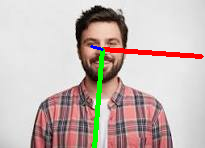

In [106]:
import statistics
face_mesh = mediapipe.solutions.face_mesh.FaceMesh(static_image_mode=True)
image = cv2.imread('/content/Image1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = face_mesh.process(image_rgb)
if results.multi_face_landmarks:
    nose_landmark = results.multi_face_landmarks[0].landmark[5]
    nose_x = int(nose_landmark.x * image.shape[1])
    nose_y = int(nose_landmark.y * image.shape[0])
    image_with_axes = draw_axis(image, Predict[0,0],Predict[0,1],Predict[0,2], nose_x, nose_y)
    cv2_imshow(image_with_axes)
face_mesh.close()

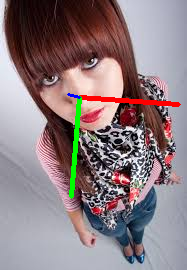

In [107]:
face_mesh = mediapipe.solutions.face_mesh.FaceMesh(static_image_mode=True)
image = cv2.imread('/content/Image2.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = face_mesh.process(image_rgb)
if results.multi_face_landmarks:
    nose_landmark = results.multi_face_landmarks[0].landmark[5]
    nose_x = int(nose_landmark.x * image.shape[1])
    nose_y = int(nose_landmark.y * image.shape[0])
    image_with_axes = draw_axis(image, Predict[0,0],Predict[0,1],Predict[0,2], nose_x, nose_y)
    cv2_imshow(image_with_axes)
face_mesh.close()

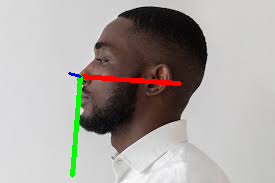

In [108]:
face_mesh = mediapipe.solutions.face_mesh.FaceMesh(static_image_mode=True)
image = cv2.imread('/content/download.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = face_mesh.process(image_rgb)
if results.multi_face_landmarks:
    nose_landmark = results.multi_face_landmarks[0].landmark[5]
    nose_x = int(nose_landmark.x * image.shape[1])
    nose_y = int(nose_landmark.y * image.shape[0])
    image_with_axes = draw_axis(image, Predict[0,0],Predict[0,1],Predict[0,2], nose_x, nose_y)
    cv2_imshow(image_with_axes)
face_mesh.close()

In [5]:
import mediapipe
import cv2

In [23]:
face_mesh = mediapipe.solutions.face_mesh.FaceMesh(static_image_mode=True)
input_video_path ='/content/video.mp4'
cap = cv2.VideoCapture(input_video_path)
output_video_path = '/content/output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, 30.0, (640, 480))  # Change resolution as needed
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(frame_rgb)
    if results.multi_face_landmarks:
        nose_landmark = results.multi_face_landmarks[0].landmark[5]
        nose_x = int(nose_landmark.x * frame.shape[1])
        nose_y = int(nose_landmark.y * frame.shape[0])

        frame_with_axes = draw_axis(frame, Predict[0,0],Predict[0,1],Predict[0,2], nose_x, nose_y)

        frame_with_axes = cv2.resize(frame_with_axes, (640, 480))  # Change resolution as needed

        out.write(frame_with_axes)

cap.release()
out.release()
face_mesh.close()
